In [21]:
import pyemu
import flopy as fp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [22]:
t_d ="master_glm"
case="pest_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
kp_inst:0,kp_inst:0,log,64,0,1,-1,0.5


In [23]:
pst.control_data.noptmax = 6
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 20 # this is how many ies uses
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

noptmax:6, npar_adj:64, nnz_obs:196


In [24]:
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../pestpp-glm","{}.pst".format(case),num_workers=6,worker_root=".",
                           master_dir=m_d)

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

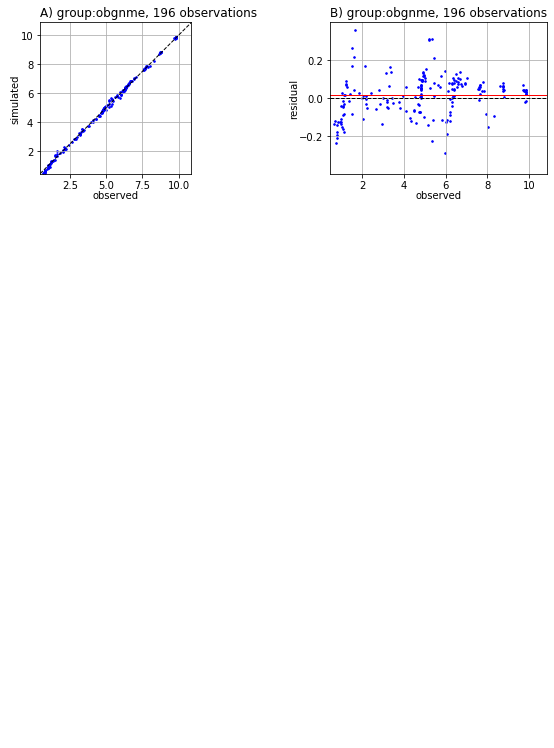

In [25]:
pst_a = pyemu.Pst(os.path.join(m_d,"{}.pst".format(case)))
pst_a.plot(kind='1to1')

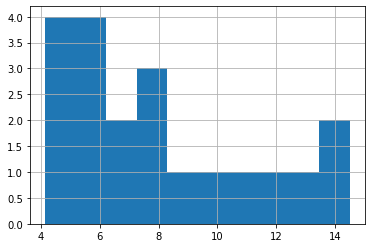

In [26]:
df = df=pd.read_csv(os.path.join(m_d,"{}.post.obsen.csv".format(case)),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)
ax = oe.phi_vector.hist()

In [27]:
dfp = df=pd.read_csv(os.path.join(m_d,"{}.par.usum.csv".format(case)),index_col=0)
10**dfp["post_mean"]

name
KP_INST:0_I:6_J:6       0.229757
KP_INST:0_I:6_J:18      0.282152
KP_INST:0_I:6_J:30      0.194746
KP_INST:0_I:6_J:42     10.000000
KP_INST:0_I:6_J:54     10.000000
                         ...    
KP_INST:0_I:90_J:42     1.180853
KP_INST:0_I:90_J:54     0.100000
KP_INST:0_I:90_J:66     0.483600
KP_INST:0_I:90_J:78    10.000000
KP_INST:0_I:90_J:90     4.423866
Name: post_mean, Length: 64, dtype: float64

In [28]:
pst.parameter_data.parval1 = 10**dfp["post_mean"].values
pst.control_data.noptmax = 0 # one run

pst.write(os.path.join(t_d,"{}.pst".format(case)))

pyemu.os_utils.run("..\pestpp-glm.exe {}".format(case),cwd=t_d)

noptmax:0, npar_adj:64, nnz_obs:196


Text(0.5, 1.0, 'k after inversion')

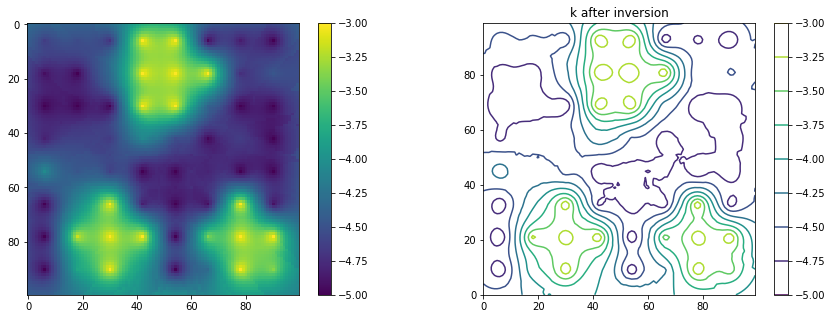

In [50]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

# inversion
g= ax[0].imshow(np.log10(np.loadtxt(os.path.join(t_d,"k.txt"))))
plt.colorbar(g,ax=ax[0])
plt.title("k after inversion")

a=ax[1].contour(np.flipud(np.log10(np.loadtxt(os.path.join(t_d,"k.txt")))))
ax[1].set_aspect("equal")
plt.colorbar(a,ax=ax[1])
plt.title("k after inversion")

Text(0.5, 1.0, 'k after inversion')

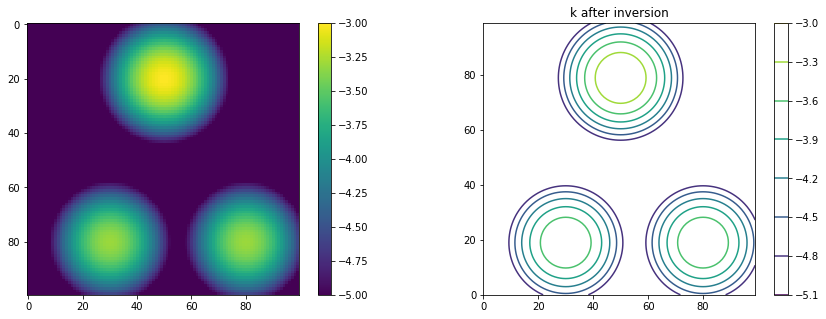

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

# inversion
g= ax[0].imshow(np.log10(np.loadtxt(os.path.join("workspace","k.txt"))))
plt.colorbar(g,ax=ax[0])
plt.title("k after inversion")

a=ax[1].contour(np.flipud(np.log10(np.loadtxt(os.path.join("workspace","k.txt")))))
ax[1].set_aspect("equal")
plt.colorbar(a,ax=ax[1])
plt.title("k after inversion")

2.114979089631787 {'obgnme': 2.114979089631787} {'obgnme': 1.0}


[None,
 None,

<Figure size 576x756 with 0 Axes>

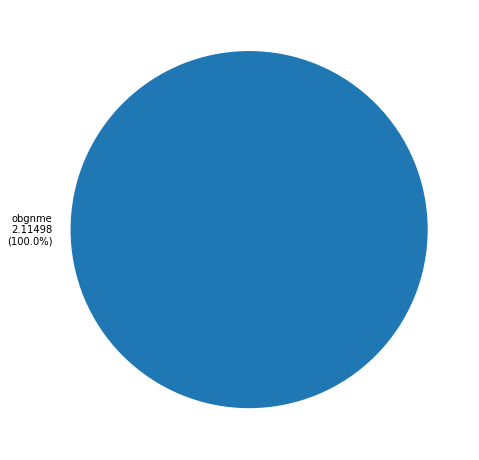

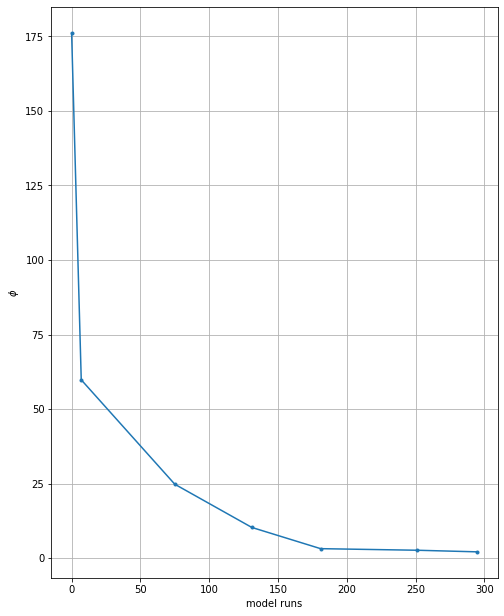

In [53]:
pst_a.plot()